# **Visualización para análisis exporatorio**
# AE04. Matplotlib Subgráficos y Colores

En esta clase vamos a continuar el proceso de graficar utilizando matplotlib, principalmente:

- Trabajar con subgráficos
- Graficar con la orientación a objetos de matplotlib
- Cálculo de estadísticas con Pandas
- Manejo de anotaciones y uso de los colores con matplotlib

Comenzamos importando las librerías que vamos a utilizar:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Para hacer las visualizaciones, utilizaremos el set de datos de las flores de Iris.

In [ ]:
iris_path = "/content/drive/MyDrive/VD03.csv"

iris_df = pd.read_csv(iris_path)
iris_df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
35,36,5.0,3.2,1.2,0.2,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa
23,24,5.1,3.3,1.7,0.5,Iris-setosa
140,141,6.7,3.1,5.6,2.4,Iris-virginica
131,132,7.9,3.8,6.4,2.0,Iris-virginica


## <font color='blue'>__Trabajando con subgráficos (subplots)__</font>

Si bien podríamos generar todos los gráficos que nosotros queramos uno a uno, matplotlib nos ofrece una interfaz para generar subgráficos. En este caso, en la misma área donde podemos generar un gráfico, podemos seccionarlo en $n$ subgráficos que queramos. Para esto, utilizaremos el método `plt.subplots`, el cual nos retornara dos elementos los cuales llamaremos `fig` y `ax`. El primer elemento corresponde a un objeto [Figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure) de matplotlib, y el segundo elemento corresponde a una lista de objetos [Axes](https://matplotlib.org/api/axes_api.html?highlight=axes#module-matplotlib.axes). Este último, nos servirá para poder realizar los gráficos en cada una de las secciones que automáticamente matplotlib separa.

Los parámetros de entrada para el método `plt.subplots(filas, columnas, figsize=(width,height))`, y tal como detallan: determinan el número de filas, columnas y el tamaño de la figura respectivamente. Algo importante a tener en cuenta es:

- Si uno utiliza `plt.subplots(1,1)`, el objeto `ax` corresponderá a **una** instancia del objeto `Axes`.
- Si uno definiera `plt.subplots(n,1)` o `plt.subplots(1,n)`, el objeto `ax` correspondería a una **lista unidimensional** de objetos `Axes`.
- Finalmente si definiéramos `plt.subplots(n,m)`, `ax` seria ahora un **arreglo bidimensional** con $n$ filas y $m$ columnas.

Utilizando la interfaz de objetos de matplotlib, procederemos a graficar un histograma de la variable `SepalLengthCm` de iris_df y un Boxplot asociado a la misma variable.


[<Axes: > <Axes: >]


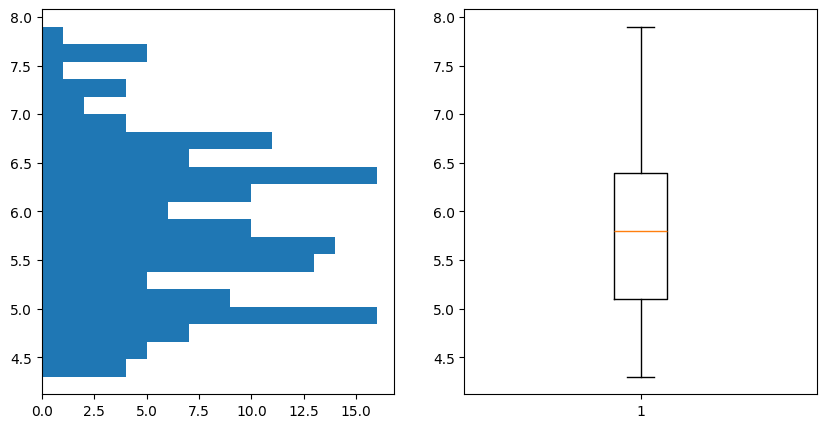

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,5)) # Definiremos 1 fila y 2 columnas
print(ax) # Imprimiremos la lista obtenida de ax

ax[0].hist(iris_df['SepalLengthCm'], orientation='horizontal', bins=20) # Accederemos al primer Axis y pintaremos un histograma en dicho Axis
ax[1].boxplot(iris_df['SepalLengthCm']) # Accederemos al segundo Axis y graficaremos un boxplot

plt.show()

Un ejemplo de cómo acceder a cada `Axis` cuando generamos subgráficos con 2 filas y 2 columnas:

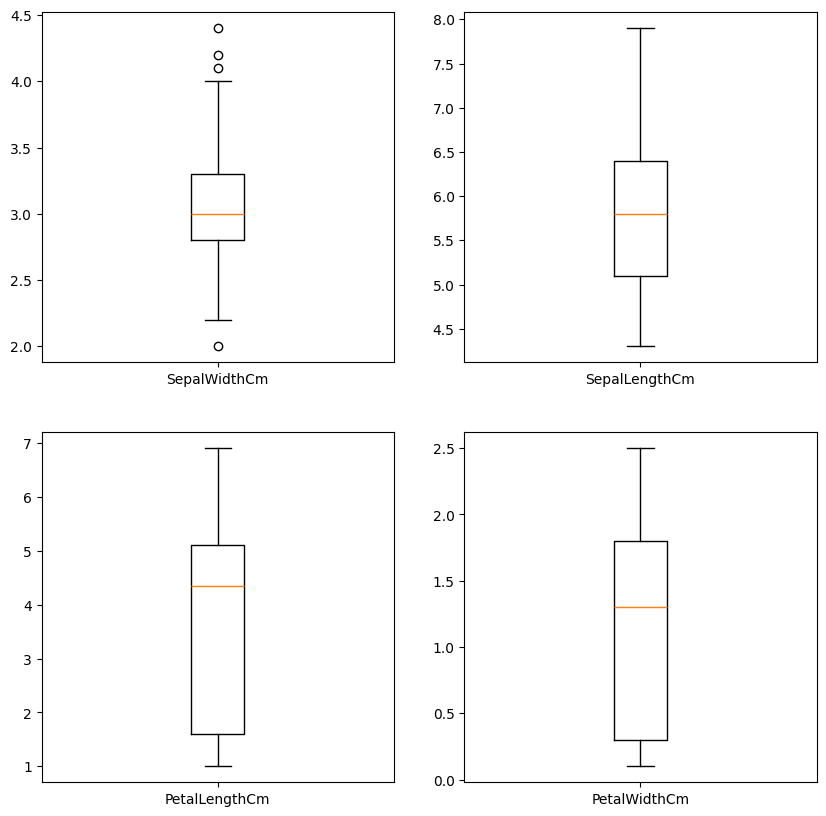

In [ ]:
fig,ax = plt.subplots(2, 2, figsize=(10,10)) # generamos 4 subgraficos (2 filas y 2 columnas)

# Primera Fila, Primera Columna
ax[0,0].boxplot(iris_df['SepalWidthCm']) # Generamos el boxplot para la variable SepalWidthCm
ax[0,0].set_xticklabels(["SepalWidthCm"]) # utilizamos el método set_xticklabels, para añadir el nombre de la variable en el eje X

# Primera Fila, Segunda Columna
ax[0,1].boxplot(iris_df['SepalLengthCm'])
ax[0,1].set_xticklabels(["SepalLengthCm"])

# Segunda Fila, Primera Columna
ax[1,0].boxplot(iris_df['PetalLengthCm'])
ax[1,0].set_xticklabels(["PetalLengthCm"])

# Segunda Fila, Segunda Columna
ax[1,1].boxplot(iris_df['PetalWidthCm'])
ax[1,1].set_xticklabels(["PetalWidthCm"])

plt.show()

Una forma alternativa utilizando la interfaz funcional (pyplot), para la generación de subgraficos corresponden al uso del metodo `subplot`

[Documentación plt.subplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplot.html?highlight=pyplot%20subplot#matplotlib.pyplot.subplot)

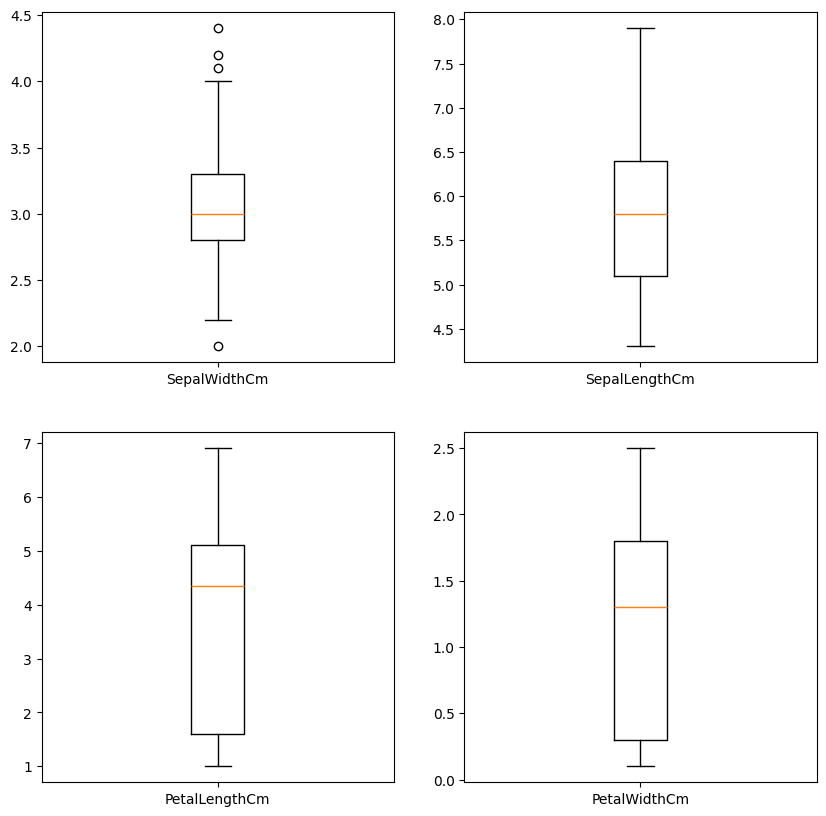

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(221) # 2 filas, 2 columnas, subfigura 1
plt.boxplot(iris_df['SepalWidthCm'])
plt.xticks(ticks=[1],labels=["SepalWidthCm"])

plt.subplot(222) # 2 filas, 2 columnas, subfigura 2
plt.boxplot(iris_df['SepalLengthCm'])
plt.xticks(ticks=[1],labels=["SepalLengthCm"])

plt.subplot(223) # 2 filas, 2 columnas, subfigura 3
plt.boxplot(iris_df['PetalLengthCm'])
plt.xticks(ticks=[1],labels=["PetalLengthCm"])

plt.subplot(224) # 2 filas, 2 columnas, subfigura 4
plt.boxplot(iris_df['PetalWidthCm'])
plt.xticks(ticks=[1],labels=["PetalWidthCm"])

plt.show()

## <font color='blue'>__Repaso: Estadísticas utilizando Pandas y Numpy__</font>
Una forma rápida para poder obtener las estadísticas de centralidad y variabilidad, es utilizando el método `.describe()`. Éste generará dichas múltiples estadísticas para cada una de las columnas **numéricas** presente en un DataFrame. Las estadísticas que muestra son:

- count: el número de elementos **no nulos** existentes en la columna
- mean: la media asociada a la columna
- std: la desviación estándar asociada a la columna
- min: valor mínimo presente en la columna
- 25%: primer cuartil $(Q_1)$
- 50%: segundo cuartil $(Q_2)$, (la mediana)
- 75%: tercer cuartil $(Q_3)$
- max: valor máximo presente en la columna


In [ ]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Para datos categóricos, se puede utilizar el parámetro `include=['object']` para obtener estadísticas tales como:
    
- count: Cantidad de elementos no nulos
- unique: Cantidad de valores únicos presentes en la columna
- top: Ejemplo del valor único con mayor cantidad de elementos en la columna
- freq: el total de elementos presentes en la columna, con respecto al valor obtenido en top


In [ ]:
iris_df.describe(include=["object"])

,Species
count,150
unique,3
top,Iris-setosa
freq,50


Con un DataFrame, podemos utilizar el método `.mean()` para obtener la media de cada una de las variables. Para cada una de las estadísticas mencionadas anteriormente, existe métodos para cada una de las estadísticas. [Métodos asociados a estadisticas](https://Pandas.pydata.org/Pandas-docs/stable/user_guide/computation.html#method-summary)

In [ ]:
iris_df.mean(numeric_only=True) # Media para cada columna
                                # usar el argumento: numeric_only=True

,0
Id,75.500000
SepalLengthCm,5.843333
SepalWidthCm,3.054000
PetalLengthCm,3.758667
PetalWidthCm,1.198667


También podemos especificar las columnas las cuales se calcularán las estadísticas

In [ ]:
columns = ['SepalLengthCm', 'SepalWidthCm']
iris_df[columns].mean()

,0
SepalLengthCm,5.843333
SepalWidthCm,3.054000


Solo por *sanity check*, comprobamos que el método de Numpy da el mismo resultado que el implementado en Pandas

In [ ]:
iris_df['SepalLengthCm'].mean(), np.mean(iris_df['SepalLengthCm']) # Media para la columna 'SepalLengthCm'

(5.843333333333334, 5.843333333333334)

Ejemplo de cómo obtener $Q_1$, $Q_2$ y $Q_3$ uno a uno:

In [ ]:
print(iris_df['SepalLengthCm'].quantile(0.25),
      iris_df['SepalLengthCm'].quantile(0.5),
      iris_df['SepalLengthCm'].quantile(0.75))

5.1 5.8 6.4


O en su defecto, al método `.quantile`, dar como parámetro de entrada una lista con los cuantiles que queremos:

In [ ]:
iris_df['SepalLengthCm'].quantile([0.25, 0.5, 0.75])

,SepalLengthCm
0.25,5.1
0.50,5.8
0.75,6.4


## <font color='blue'>__Manejo de anotaciones__</font>

Anteriormente, habíamos visto el uso del método `plt.text` para poder colocar texto en nuestras visualizaciones. Existe otro método, que da una mayor flexibilidad al momento de hacer nuestras anotaciones, incorporando el uso de flechas y otros efectos los cuales se detallan en el siguiente enlace:

[Tutorial de anotaciones](https://matplotlib.org/3.1.1/tutorials/text/annotations.html)

Para hacer el uso del método de anotación se definen como mínimo dos parámetros: `text` (el string a mostrar) y `xy`, par de coordenadas del gráfico con los valores $x$ e $y$. A modo de ejemplo, vamos a ver el uso de `plt.annotate`:


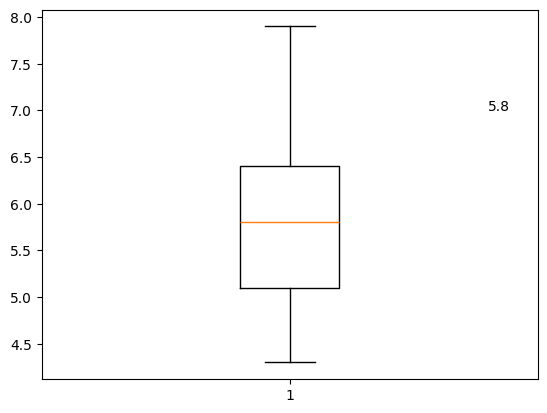

In [ ]:
width = 0.2 #Vamos a definir un valor de ancho para el boxplot que vamos a graficar
# quantile nos devuelve una serie; extraemos el valor de ella
median = iris_df['SepalLengthCm'].quantile([0.5]).values[0]

# Sabiendo que por defecto, matplotlib deja en el valor de x=1 el primer boxplot,
# vamos a generar la anotación en el eje x (1 + width/2), y en el eje y, el valor de la mediana
xy = (1.4 , 7) #Guardamos este par en una tupla con el nombre de xy

plt.boxplot(iris_df['SepalLengthCm'],widths=width) # Graficamos nuestro boxplot (con ancho=width)
plt.annotate( text=f'{median}', xy = xy) #generamos la anotación, con s="5.8" (el valor de la mediana), y las coordenadas xy

plt.show()

Cabe destacar que la anotación tiene un punto de partida el cual nosotros detallamos con el par `xy`, pero a su vez nosotros podemos modificar las coordenadas de donde mostramos el texto. Esto va a ser útil con una opción que vamos a ver más adelante. En este caso, podemos modificar las coordenadas xy del texto utilizando el parámetro `xytext`:

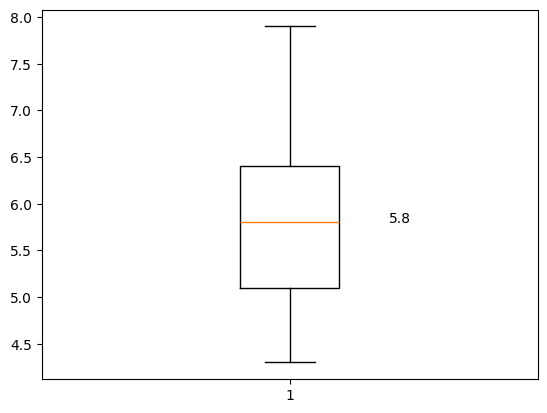

In [ ]:
width = 0.2
xy = (1 + width/2 , median)

xytext = (1 + width ,5.8) #Movemos las coordenadas XY del texto correspondiente al ancho del boxplot.

plt.boxplot(iris_df['SepalLengthCm'], widths=width)

plt.annotate(text = f'{median}', xy = xy,
             xytext = xytext) # Añadimos las nuevas coordenadas para el texto
plt.show()

A su vez, podemos definir las coordenadas xy para el texto utilizando coordenadas, o en su defecto, posiciones proporcionales al tamaño del gráfico. En este caso, vamos a utilizar subplots para mostrar las dos formas, coordenadas y proporciones. Para poder detallar una de las dos modalidades tenemos que hacer uso del parámetro `xycoords`, el cual inicializamos en alguno de los dos valores: `"data"` (por defecto) o `"axes fraction"`.

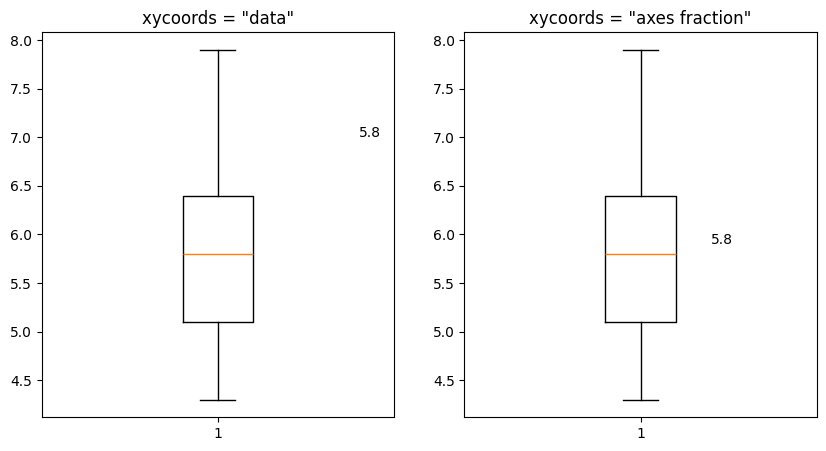

In [ ]:
width = 0.2

#para xycoords="data", no tenemos que cambiar nada de como lo hemos estado haciendo
xy = (1.4, 8)
xytext = (1.4 , 7) #Movemos las coordenadas XY del texto

plt.figure(figsize=(10,5)) #definimos una nueva figura de width=10, height=5
plt.subplot(121) # Trabajamos con el primer subplot
xycoords="data" # definimos xycoords= "data" y realizamos la misma operacion como anteriormente lo habiamos hecho
plt.boxplot(iris_df['SepalLengthCm'],widths=width)
plt.annotate(text = f'{median}',
             xy = xy,
             xytext = xytext,
             xycoords = xycoords)
plt.title('xycoords = "data"')

plt.subplot(122) # El subplot 2, las coordenadas xy se van a generar con "axes fraction"
xytext = (0.7, 0.45) #I deal entre x,y \in [0,1], en este caso cambiamos los valores en proporciones con respecto a la figura (0.7 del eje X y 0.45 del eje Y)
xycoords="axes fraction" # Reemplazamos el valor de xycoords
plt.boxplot(iris_df['SepalLengthCm'],widths=width)
plt.annotate(text = f'{median}',
             xy = xy,
             xytext = xytext,
             xycoords = xycoords)
plt.title('xycoords = "axes fraction"')

plt.show()

Finalmente, vamos a retomar el por qué podemos definir un inicio de la anotación con las coordenadas xy, para luego separar el texto con xytext. La idea, es que ahora nosotros podemos agregar flechas las cuales nos permiten resaltar de mejor manera lo que nosotros queremos anotar. Para esto, necesitamos definir un diccionario el cual le vamos a llamar `arrowprops`, y contiene las siguientes keys/values:

- `arrowstyle`: '->' Queremos un estilo de flecha tradicional
- `connectionstyle`: 'arc3' Queremos que, desde el texto hacia el inicio de la anotación, se genere con una línea recta

Más posibles valores para estos dos keys, la pueden ver en el [Tutorial](https://matplotlib.org/3.1.1/tutorials/text/annotations.html#annotating-with-arrow) de las anotaciones. Finalmente, nosotros añadimos al método `annotate`, el nuevo diccionario utilizando el parámetro `arrowprops`. El ejemplo se ve a continuación:


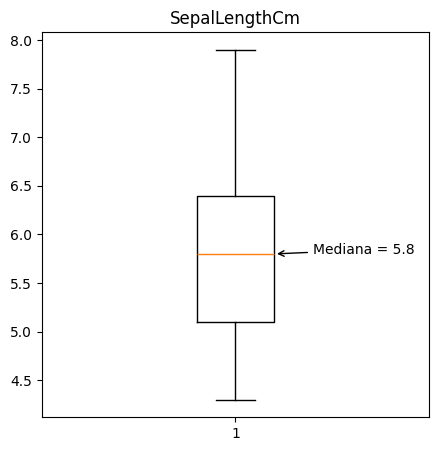

In [ ]:
width = 0.2
xy = (1 + width/2 , median)
xytext = (1 + width , median) # Movemos las coordenadas XY del texto
xycoords = "data"

arrowprops = dict(arrowstyle="->", connectionstyle="arc3") # Añadimos el diccionario utilizando la función de construccion dict

fig, ax = plt.subplots(1, 1, figsize=(5, 5)) # definimos un subplot de fila 1, columna 1 y detallamos su largo ancho

ax.boxplot(iris_df['SepalLengthCm'], widths=width) # Pintamos nuestro boxplot

ax.annotate(text = f"Mediana = {median}",
            xy = xy,
            xytext = xytext,
            xycoords = xycoords,
            arrowprops = arrowprops)

ax.set_title("SepalLengthCm")
plt.show()

### <font color='green'>Actividad 1:</font>


Generar dos gráficos de cajas y bigotes (idealmente con subplots). El primero debe ser la variable "SepalWidthCm" y el segundo una variable de su elección. Además de esto, debe realizar anotaciones para cada uno de los siguientes elementos:

- Mediana
- Media
- Primer Cuartil
- Tercer Cuartil
- Outliers

**Notas:**
1. Pueden alternar las posiciones X de las anotaciones para que los gráficos no se vean cargados hacia un lado.

2. Como desafío, pueden generar una función la cual reciba como parámetros los diversos elementos que forman una anotación. Esto lo pueden realizar para mejorar la legibilidad de su código.


Text(1.15, 5.3999999999999995, 'Q3: 5.1')

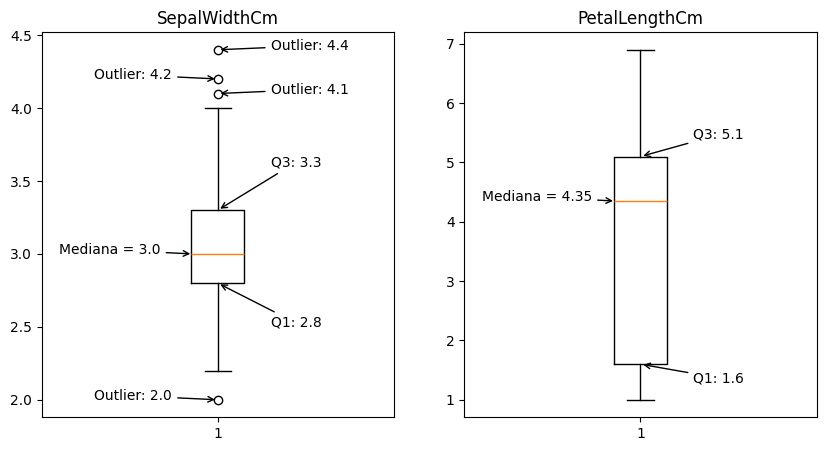

In [ ]:
# Su código aquí ...

iris_path = "/content/drive/MyDrive/BITACORA - Grupo 3/03 ANALISIS EXPLORATORIO Y ESTADISTICA/Archivos/VD03.csv"
iris_df = pd.read_csv(iris_path)

## Calcular valores y parametros para SepalWidth
medianSW = iris_df['SepalWidthCm'].quantile([0.5]).values[0]
Q1SW = iris_df['SepalWidthCm'].quantile([0.25]).values[0]
Q3SW = iris_df['SepalWidthCm'].quantile([0.75]).values[0]
IRQSW = Q3SW - Q1SW
mask_outliers =  (iris_df['SepalWidthCm'] < Q1SW - 1.5*IRQSW)|(iris_df['SepalWidthCm'] > Q3SW + 1.5*IRQSW)
outliers = iris_df.loc[mask_outliers,'SepalWidthCm'].sort_values(ascending=False)


## Calcular valores y parametros para PetalLength
medianPL = iris_df['PetalLengthCm'].quantile([0.5]).values[0]
Q1PL = iris_df['PetalLengthCm'].quantile([0.25]).values[0]
Q3PL = iris_df['PetalLengthCm'].quantile([0.75]).values[0]

# Configurar parametros generales
width=2
xycoords = "data"
arrowprops = dict(arrowstyle="->", connectionstyle="arc3") # Añadimos el diccionario utilizando la función de construccion dict

# Dibujar figura
fig, ax = plt.subplots(1,2,figsize=(10,5))

# Dibujar figura de la izquierda
ax[0].boxplot(iris_df['SepalWidthCm'])
ax[0].set_title('SepalWidthCm')

# Anotaciones figura izquierda
for i,o in enumerate(outliers):
  if i%2==0:
    xytext = (width/2+0.15 ,o)
  else:
    xytext = (width/2-0.35 ,o)
  ax[0].annotate(text = f"Outlier: {o}",
            xy = (width/2 ,o),
            xytext = xytext,
            xycoords = xycoords,
            arrowprops = arrowprops)


ax[0].annotate(text = f"Mediana = {medianSW}",
            xy = (width/2-0.07,medianSW),
            xytext = (width/2-0.45,medianSW),
            xycoords = xycoords,
            arrowprops = arrowprops)

ax[0].annotate(text = f"Q1: {Q1SW}",
            xy = (width/2,Q1SW),
            xytext = (width/2+0.15,Q1SW-0.3),
            xycoords = xycoords,
            arrowprops = arrowprops)

ax[0].annotate(text = f"Q3: {Q3SW}",
            xy = (width/2,Q3SW),
            xytext = (width/2+0.15,Q3SW+0.3),
            xycoords = xycoords,
            arrowprops = arrowprops)

# Dibujar figura de la derecha
ax[1].boxplot(iris_df['PetalLengthCm'])
ax[1].set_title('PetalLengthCm')

# Anotaciones figura izquierda
ax[1].annotate(text = f"Mediana = {medianPL}",
            xy = (width/2-0.07,medianPL),
            xytext = (width/2-0.45,medianPL),
            xycoords = xycoords,
            arrowprops = arrowprops)

ax[1].annotate(text = f"Q1: {Q1PL}",
            xy = (width/2,Q1PL),
            xytext = (width/2+0.15,Q1PL-0.3),
            xycoords = xycoords,
            arrowprops = arrowprops)

ax[1].annotate(text = f"Q3: {Q3PL}",
            xy = (width/2,Q3PL),
            xytext = (width/2+0.15,Q3PL+0.3),
            xycoords = xycoords,
            arrowprops = arrowprops)


Resultado esperado aproximado:<br><br>
<img src="https://drive.google.com/uc?id=1pgZW18BW7dGa-5Ij2A5xoM5Vl6Cmx4Ra">


<font color='green'>Fin actividad 1</font>

## <font color='blue'>__Manejo de colores__</font>

Un punto más a personalizar de nuestros gráficos, corresponden al uso de colores en las marcas/líneas dentro de nuestras visualizaciones. Ya vimos en la clase pasada, el cómo cambiar el color desde la especificación del marcador. Ahora vamos a ver como cambiarlo utilizando el parámetro `color`

En primer lugar, generemos un diagrama de dispersión entre `iris_df['PetalWidthCm']` y `iris_df['PetalLengthCm']`:


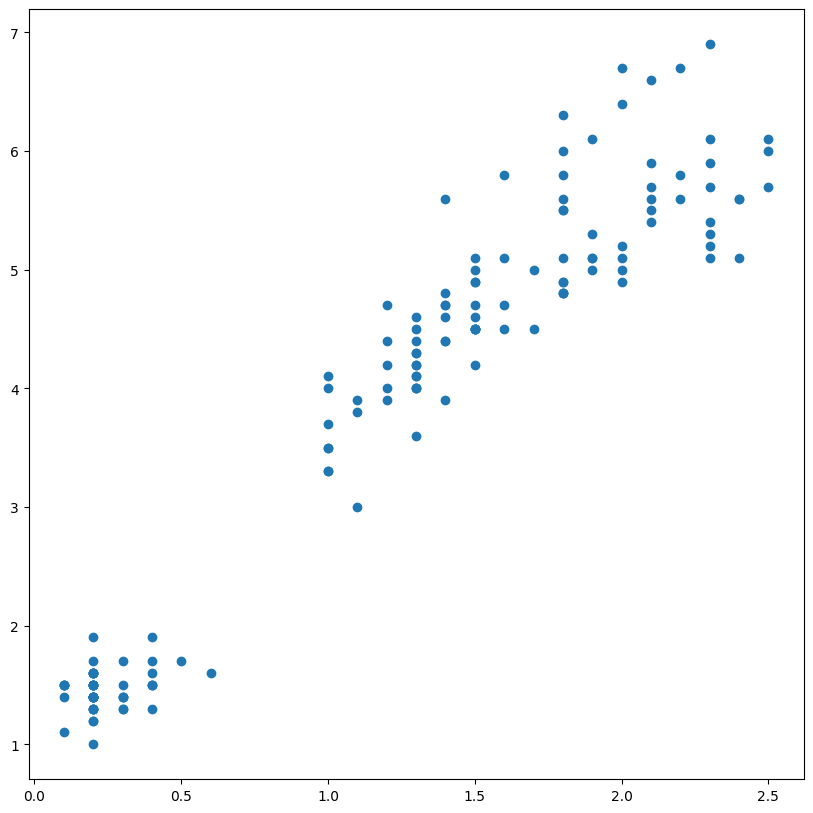

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.scatter(iris_df['PetalWidthCm'], iris_df['PetalLengthCm'])
plt.show()

Acá estamos viendo en general la distribución de los puntos donde existe una alta correlación entre las variables. Ahora le pregunta: ¿Cómo podríamos añadirle por color según cada una de las Especies presente en el set de datos?

In [ ]:
iris_df['Species'].unique() # Estas son las 3 especies, ordenadas alfabeticamente

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Para poder añadir el color en nuestros gráficos tal como detallamos anteriormente, hay que utilizar el parámetro color. Si el valor asignado a este parámetro es un único valor, entonces a todos los valores que se están graficando se les asignara dicho color. En el caso que el valor asignado a este parámetro fuese una lista, entonces a cada elemento individual de dicho gráfico se le asignara el color correspondiente en la lista. La restricción de esta forma es utilizar la misma cantidad de colores, como elementos que se están graficando.

Los valores que se les puede asignar al parámetro de color son los siguientes:

- RGB o RGBA utilizando una tupla de valores entre $[0,1]$, Para RGB son 3 valores (Red, Green, Blue) y para RGBA son 4 valores (Red, Green, Blue, Alpha). ej: (0.2,0.5,0.1) o (0.3,0.5,0.7,0.3)
- String de RGB o RGBA en formato Hexadecimal. Ej: `"#05AAF0"` o `"#05AAF0FF"`
- Un String representando un valor numérico de la escala de grises. Ej: `"0.5"`
- Una letra indicando el posible color. Ej: `"r"` para rojo, `"b"` para azul, `"k"` para negro, etc.
- Un nombre del color de la lista [X11/CSS4](https://en.wikipedia.org/wiki/X11_color_names#Color_name_chart) ej: 'blue', 'red'
- Un nombre del color obtenido de la encuesta realizada por [xkcd](https://c.xkcd.com/random/comic/) para asignarle nombres a unos grupos de colores [Lista de colores](https://xkcd.com/color/rgb/). [Motivación para la encuesta](https://blog.xkcd.com/2010/05/03/color-survey-results/). Para utilizar estos colores, hay que poner como prefijo en el string el texto 'xkcd:'. Ej: 'xkcd:ugly yellow', 'xkcd:almost black', 'xkcd: very pale blue'

[Documentación del uso de colores de Matplotlib](https://matplotlib.org/3.1.0/tutorials/colors/colors.html)


En este caso, nosotros vamos ahora a pintar los puntos dependiendo de la especie. Para esto, vamos a ordenar el dataframe según la columna `Species` alfabéticamente, luego vamos a asignarle un color para cada uno de los puntos asociados a una especie. Como hemos ordenado el dataframe alfabéticamente, los primeros 50 puntos van a corresponder a `Iris Setosa`, los siguiente 50 para `Iris Versicolor` y finalmente los últimos 50 para `Iris Virginica`.

**Nota:** Podemos asumir el número de muestras para cada una de las especies, debido a que el set de datos de iris es un conjunto balanceado. Para ver otros posibles sets de datos, convendría ver cuáles son el número de muestras para cada variable categórica a pintar. Para esto podríamos ocupar el método `value_counts`, ej: `df['columna'].value_counts()`


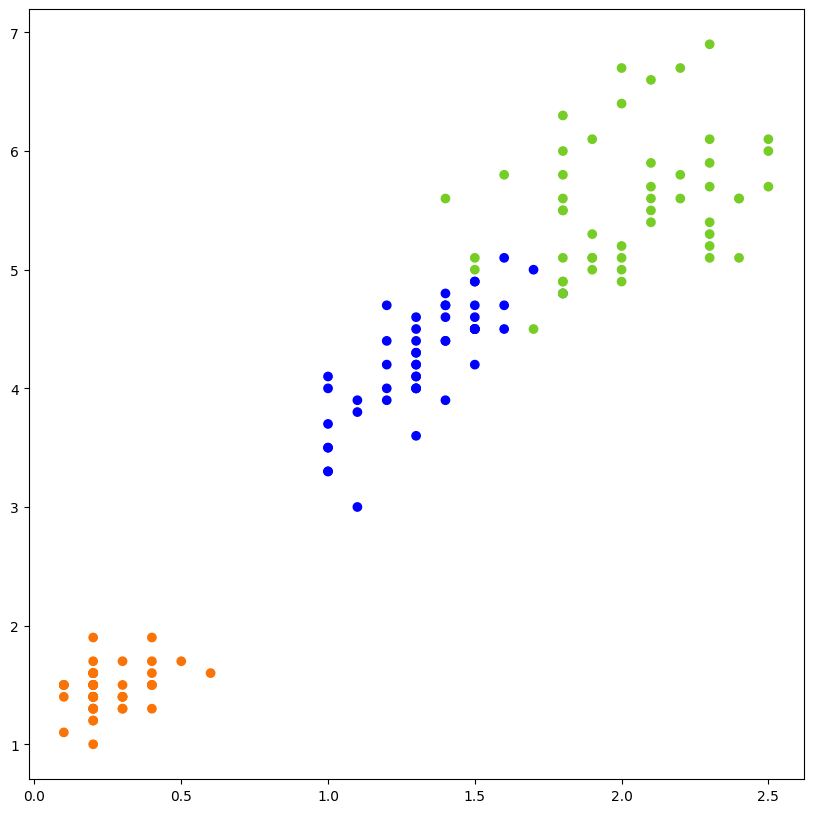

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

sorted_df = iris_df.sort_values(['Species']) # Vamos a ordenar según Species nuestro dataframe

# De esta forma, vamos a asignarle el color a cada punto obtenido en la proyección de ambas variables
# Generamos una lista, lo multiplicamos por 50 (Repetimos 50 veces los valores de la lista) y finalmente
# concatenamos todos los colores con el operador +


color1 = ["#f97306"] * 50 # Naranjo en formato RGB Hexadecimal para Iris-Setosa
color2 = ['Blue'] * 50 # Azul en formato X11/CSS4 para Iris-Versicolor
color3 = ['xkcd:apple green'] * 50 # "Verde manzana" en formato xkcd para Iris-Virginica

color_final = color1 + color2 + color3 # Generamos los colores para cada punto
ax.scatter(iris_df['PetalWidthCm'], iris_df['PetalLengthCm'],color=color_final) # Ocupamos el parámetro color para asignar los colores

plt.show()

Una forma alternativa, seria separar el dataframe para cada una de las especies y luego utilizar el método `plot` (o en este caso scatter) para cada uno de estas nuevas secciones.

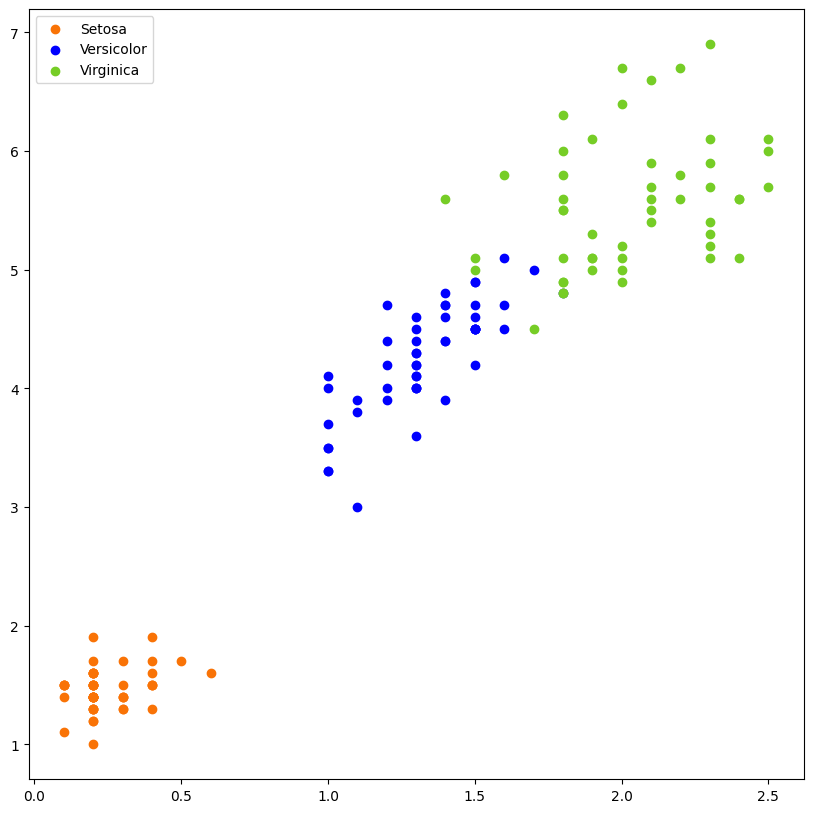

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

sorted_df = iris_df.sort_values(['Species'])# Ordenamos el dataframe por Species

setosa_df = sorted_df.iloc[0:50 , :]  # Generamos una seccion del dataframe para iris setosa
versicolor_df = sorted_df.iloc[50:100 , :] # lo mismo para iris versicolor
virginica_df = sorted_df.iloc[100:150:, :] # y finalmente para iris virginica

color1 = "#f97306" # Naranjo en formato RGB Hexadecimal para Iris-Setosa
color2 = 'Blue' # Azul en formato X11/CSS4 para Iris-Versicolor
color3 = 'xkcd:apple green' # "Verde manzana" en formato xkcd para Iris-Virginica

ax.scatter(setosa_df['PetalWidthCm'], setosa_df['PetalLengthCm'], color = color1, label='Setosa') # Scatter para Setosa, con solo una instancia del color y el label para setosa
ax.scatter(versicolor_df['PetalWidthCm'], versicolor_df['PetalLengthCm'], color = color2, label='Versicolor')  #S catter para Versicolor
ax.scatter(virginica_df['PetalWidthCm'], virginica_df['PetalLengthCm'], color = color3, label='Virginica') # Scatter para Virginica

ax.legend() # Añadimos la leyenda, la cual va a respetar los colores utilizados.

plt.show()

### <font color='green'>Actividad 2:</font>

Para esta dinámica vamos a utilizar un set de datos de series temporales multivariada, específicamente el set de datos de climatológicos de la ciudad de Delhi, India. Este set de datos contiene 4 variables numéricas las cuales son:

- meantemp: Temperatura promedio de un día
- humidity: Valor de humedad ambiente diario
- wind_speed: Velocidad del viento en Km/h
- meanpressure: Medición de presión atmosférica

Cada fila de este set de datos corresponde a un día, y el rango de fecha se extiende desde 01-enero-2013 y 01-enero-2017 (4 años). Lo que se va a pedir es lo siguiente:

1.- Obtener las estadísticas descriptivas para cada una de las variables. **¿Podemos observar algo interesante en los datos?**

2.- Obtenga la matriz de correlación y grafíquela

3.- Utilizando subgráficos, grafique para cada variable su histograma (de forma horizontal), seguido por su diagrama de caja y bigote. **¿Que podemos observar con respecto a las variables? ¿Qué creen que puede estar pasando?**

4.- Utilizando subgráficos, grafique 4 diagramas de dispersión para distintos pares de variables presentes en los datos.

5.- Utilizando subgráficos, grafique 4 diagramas de línea para cada posible variable del set de datos, utilice distintos colores para diferenciar las variables **¿Que podemos notar con esta representación?**

6.- Si es que existe algún problema con alguna de las variables, utilice el método `ax[n,m].set_ylim((lim_bajo, lim_alto))` para cambiar los valores del eje Y (Como sugerencia, utilice el rango intercuartil y la mediana de dicha variable para fijar los limites)

**Nota:** Los gráficos deberían tener título y si llegasen a requerir, títulos en los ejes. Con respecto a las anotaciones, no es necesario que en cada gráfico estén presentes. Utilícelos a conciencia.


**Desafíos**

7.- Reemplace los valores problemáticos de la variable. **¿Con que valor o método podríamos modificar estos datos problemáticos?**

8.- Con los datos corregidos, genere nuevamente los gráficos. **¿Ahora hacen mayor sentido los gráficos?**

9.- Genere un gráfico con múltiples líneas con las temperaturas promedio. El color de cada línea, debe estar relacionado al año de dicha medición. (Como ayuda, tienen que extraer el año de la columna date y luego generar una nueva columna con dichos años).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Tu código aquí ...
path = '/content/drive/MyDrive/VD04.csv'
delhi_df = pd.read_csv(path) # Hacemos la lectura de los datos
display(delhi_df)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [ ]:
# Obtener las estadísticas descriptivas para cada una de las variables.
#¿Podemos observar algo interesante en los datos?
delhi_df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


*¿Podemos observar algo interesante en los datos?*

Si, en primer lugar vemos que para cada variable tenemos un total de 1.462 datos observados. lo que nos dice que no hay datos nulos.

En cuanto a la media, la media de la temperatura es de 25.4°C, mientras que la humedad promedio en el periodo observado es de 60,7%. Por su parte la media de la velocidad del viento es de 6,8 km/h y de la presión atmosférica 1.011 hPa, lo que esta dentro de lo esperado al considerar que los valores típicos en la atmósfera terrestre oscilan entre 980 y 1.050 hPa en condiciones normales. Sin embargo, en la medición de presión atmosférica es llamativo que el valor mínimo tome un valor de -3,0 hPa y el valor máxomo 7.679,3 hPa, ya que esta medida no debería tomar valores negativos y considernado el rango normal mencionado anteriormente, intuímos que debe haber algún tipo de sesgo en esos datos de la medición.

Algo similar encontramos en la velocidad del viento, en este caso cuando miramos lo que va ocuriendo en los diferentes cuartiles vemos que las velocidades son: 3,5km/h 6,2km/h 9,2km/h para lel primer, segundo y tercer cuartil, sin embargo, el valor máximo es de 42,2 km/h por lo cual podríamos intuir algún tipo de dato atípico.



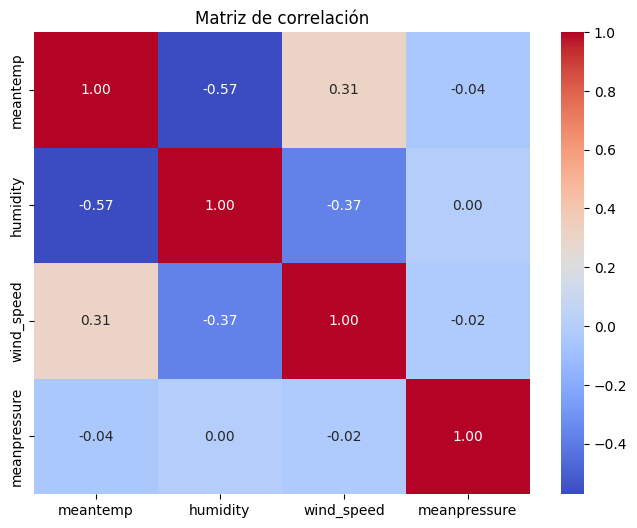

In [ ]:
#Obtenga la matriz de correlación y grafíquela
# Filtrar solo las columnas numéricas
numeric_columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
correlation_matrix = delhi_df[numeric_columns].corr()

# Graficar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de correlación")
plt.show()

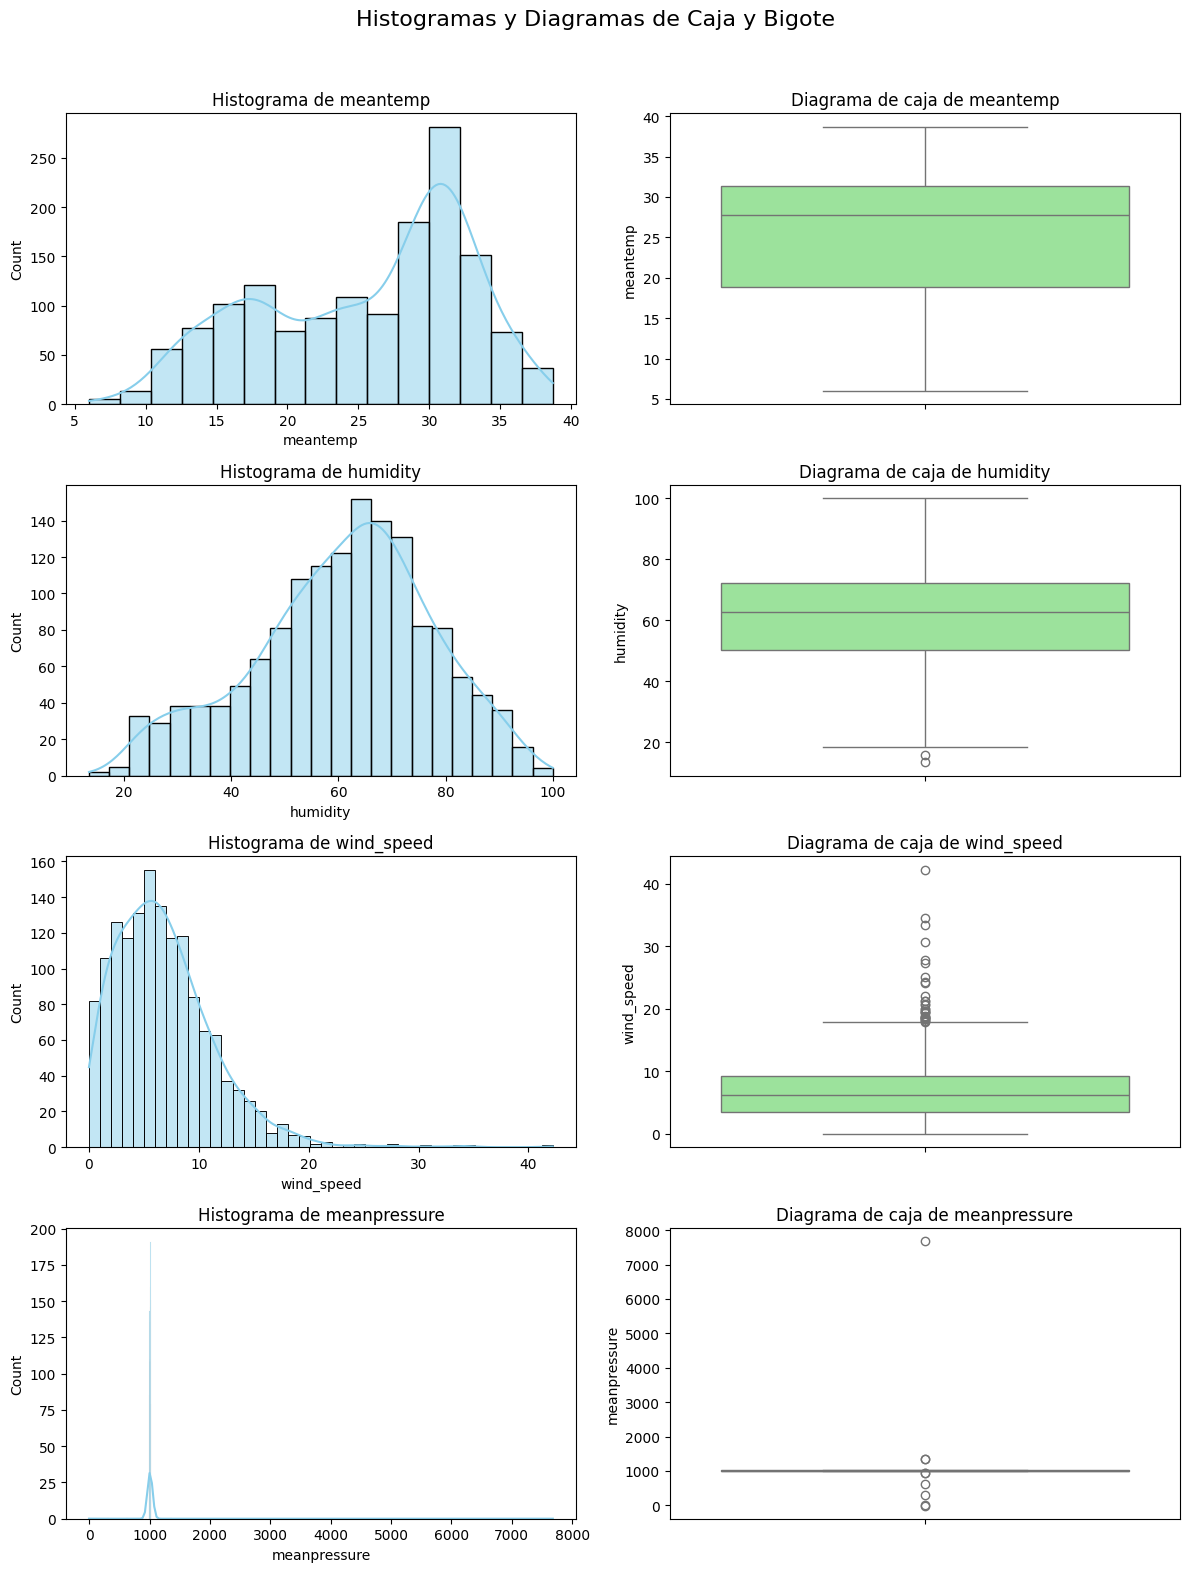

In [ ]:
#Utilizando subgráficos, grafique para cada variable su histograma (de forma horizontal), seguido por su diagrama de caja y bigote.
#¿Que podemos observar con respecto a las variables? ¿Qué creen que puede estar pasando?

# Crear la figura y los subgráficos
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
fig.suptitle("Histogramas y Diagramas de Caja y Bigote", fontsize=16)

# Histogramas y diagramas de caja para cada variable
sns.histplot(delhi_df['meantemp'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Histograma de meantemp')
sns.boxplot(y=delhi_df['meantemp'], ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Diagrama de caja de meantemp')

sns.histplot(delhi_df['humidity'], kde=True, ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Histograma de humidity')
sns.boxplot(y=delhi_df['humidity'], ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Diagrama de caja de humidity')

sns.histplot(delhi_df['wind_speed'], kde=True, ax=axes[2, 0], color='skyblue')
axes[2, 0].set_title('Histograma de wind_speed')
sns.boxplot(y=delhi_df['wind_speed'], ax=axes[2, 1], color='lightgreen')
axes[2, 1].set_title('Diagrama de caja de wind_speed')

#HABRÍA QUE RETIRAR ESTA VARIABLE DEL ESTUDIO

sns.histplot(delhi_df['meanpressure'], kde=True, ax=axes[3, 0], color='skyblue')
axes[3, 0].set_title('Histograma de meanpressure')
sns.boxplot(y=delhi_df['meanpressure'], ax=axes[3, 1], color='lightgreen')
axes[3, 1].set_title('Diagrama de caja de meanpressure')

# Ajustar espaciado
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

*¿Que podemos observar con respecto a las variables? ¿Qué creen que puede estar pasando?*

**Temperatura promedio**

En cuanto a la temperatura promedio el histograma nos muestra una distrinución ligeramente sesgada hacia la izquierda lo que se condice con que la caja del gráfico de bigotes esté ubicada ligeramente en la parte superior, en este sentido el rango intercuartílico está entre los valores 18,9°C 31,3°C. en el gráfico de bigotes vemos que la mediana está ubicada entre 25 y 30 lo cual concuerda en nuestra observación descriptiva donde la mediana es 27,7°c (segundo cuartil, 50%). Finalmente, cabe destacar que para esta medida no hay datos atípicos considerables.

**Humedad**

Para la humedad, se puede observar que la distribución se aproxima a una normal, y esto lo vemos tambien en una caja muchas centrada en el gráfico de caja y bigote, para esta medida, el rango intercuartílico esta entre 50,4% y 72,2%. en el gráfico de bigotes vemos que la mediana está ubicada cerca del 60% lo que concuerda con nuestro análisis descriptivo donde observamos una mediana de 62,6%(segundo cuartil, 50%). En este caso si observamos datos fuera del rango aceptable por lo cual si presentamos datos atípicos considerables, del cual uno de ellos es el valor mínimo ya observado anteriormente de 13,4%.

**Velocidad del viento**

Siguiendo con la velocidad del viento, se puede observar que en esta ocasión teemos una distribución sesgada hacia la derecha, lo que es consistente con que la caja del gráfico de bigotes esté ubicada fuertemente en la parte inferior y la mayoría de las velocidades estén concentradas en valores bajos, en este sentido el rango intercuartílico está entre los valores 3,5km/h y 9,2km/h. en el gráfico de bigotes vemos que la mediana está ubicada entre cerca de los 6km/h lo que concuerda con lo observado en el análisis descriptivo, donde se muestra que en el segundo cuartil el valor promedio es de 6,2km/h. Asimismo, en este caso también observamos datos fuera del rango aceptable por lo cual si presentamos muchos datos atípicos considerables, del cual uno de ellos es el valor máximo ya observado anteriormente de 42,2%.

**Presión atmosférica promedio**

Finalmente, para la presión atmosférica se puede observar que en esta ocasión la mayoría de los datos se ubican en un rango estrecho al rededor de los 1.000 hPa, lo que es consistente con los valores que en teoría puede tomar esta variable y que la caja del gráfico de bigotes esté ubicada fuertemente en esta cifra, parecinedo una línea (Este gráfico no tiene bigotes debido a la concentración de los datos).  Asimismo, en este caso también observamos datos fuera del rango aceptable por lo cual si presentamos muchos datos atípicos considerables, del cual uno de ellos es el valor máximo que es -3,0 hPa. y el valor máximo qye es 7679.0 hPa.

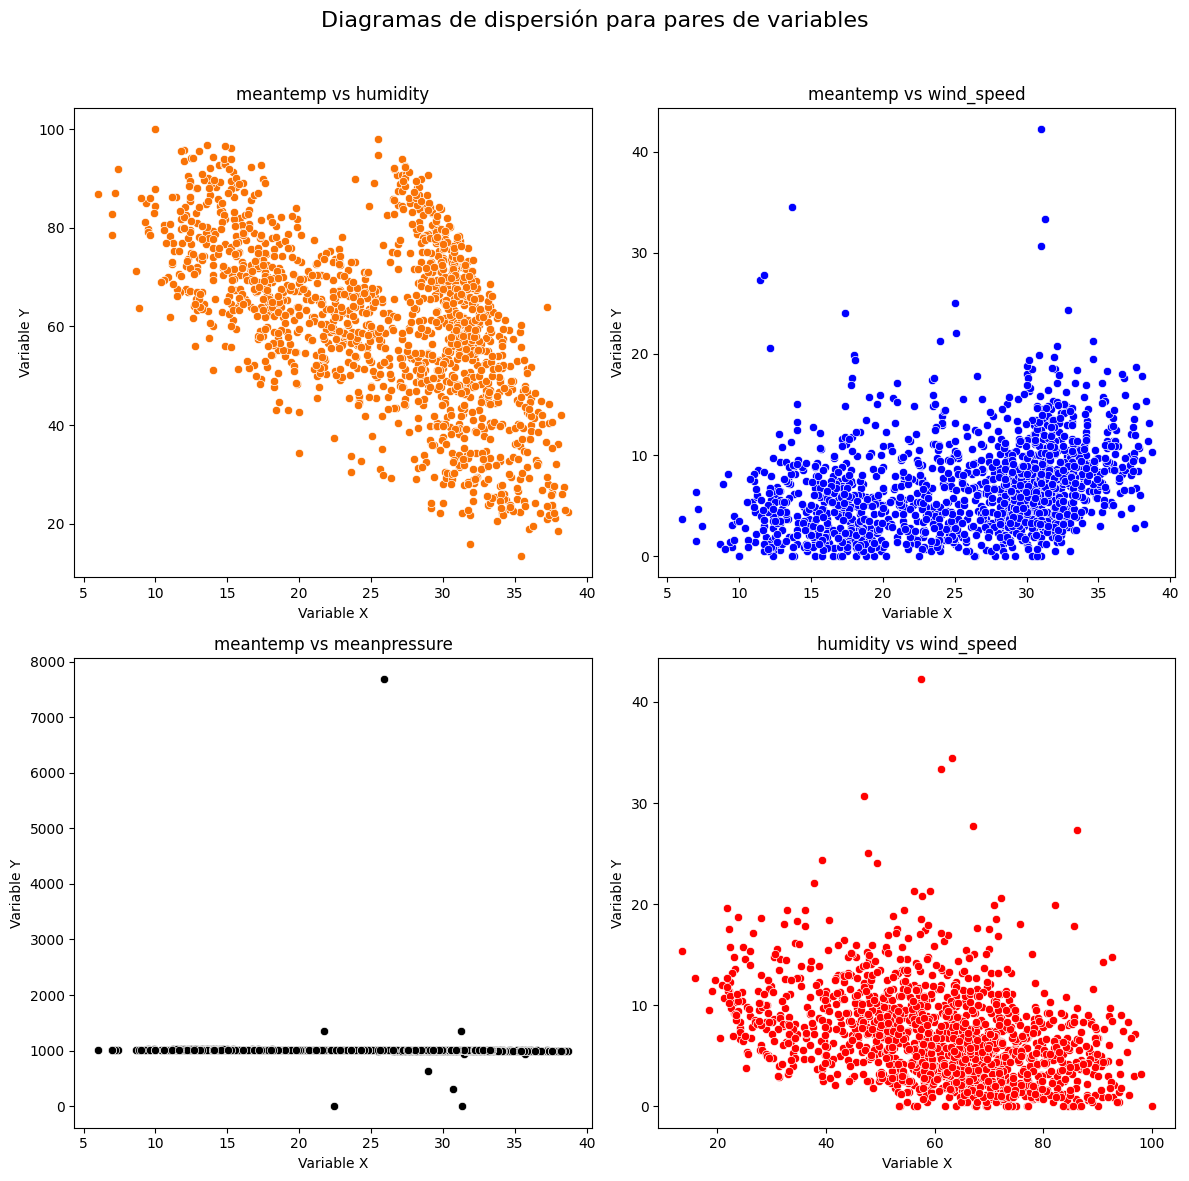

In [ ]:
#Utilizando subgráficos, grafique 4 diagramas de dispersión
#para distintos pares de variables presentes en los datos.


# Crear figura y subgráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle("Diagramas de dispersión para pares de variables", fontsize=16)

# Graficar cada par de variables en su subgráfico
sns.scatterplot(x=delhi_df['meantemp'], y=delhi_df['humidity'], ax=axes[0, 0], color="#f97306")
axes[0, 0].set_title('meantemp vs humidity')

sns.scatterplot(x=delhi_df['meantemp'], y=delhi_df['wind_speed'], ax=axes[0, 1], color="blue")
axes[0, 1].set_title('meantemp vs wind_speed')

# Graficar cada par de variables en su subgráfico (en este caso quitare el
#dato atípico de meanpressure para poder observar mejor la relación entre variables )
sns.scatterplot(x=delhi_df['meantemp'], y=delhi_df['meanpressure'], ax=axes[1, 0], color="black")
axes[1, 0].set_title('meantemp vs meanpressure')

sns.scatterplot(x=delhi_df['humidity'], y=delhi_df['wind_speed'], ax=axes[1, 1], color="red")
axes[1, 1].set_title('humidity vs wind_speed')

# Ajustar etiquetas y espaciado
for ax in axes.flat:
    ax.set_xlabel("Variable X")
    ax.set_ylabel("Variable Y")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

###<font color='red'>__LINK DE INTERÉS__: Outliers</font>

En el siguiente enlace se explica los datos **atípicos** con mayor detenimiento. Ver en siguiente link [aquí](https://www.geeksforgeeks.org/outlier/).

## <font color='purple'> __EXPERIMENTO__: </font>

### Mejorar la visualización del gráfico de temperatura promedio versus presión atmosférica promedio.


Tras visualizar que los datos atípicos no nos permiten identificar la relación entre la distribución de tempreratura y presión atmosférica, realizaré una solución rápida y quitaré los valores menores al primer cuartil y los mayores al tercer cuartil, de esta manera espero quitar los datos atípicos y obtener una visualizción más real de cómo se relacionan ambas variables.

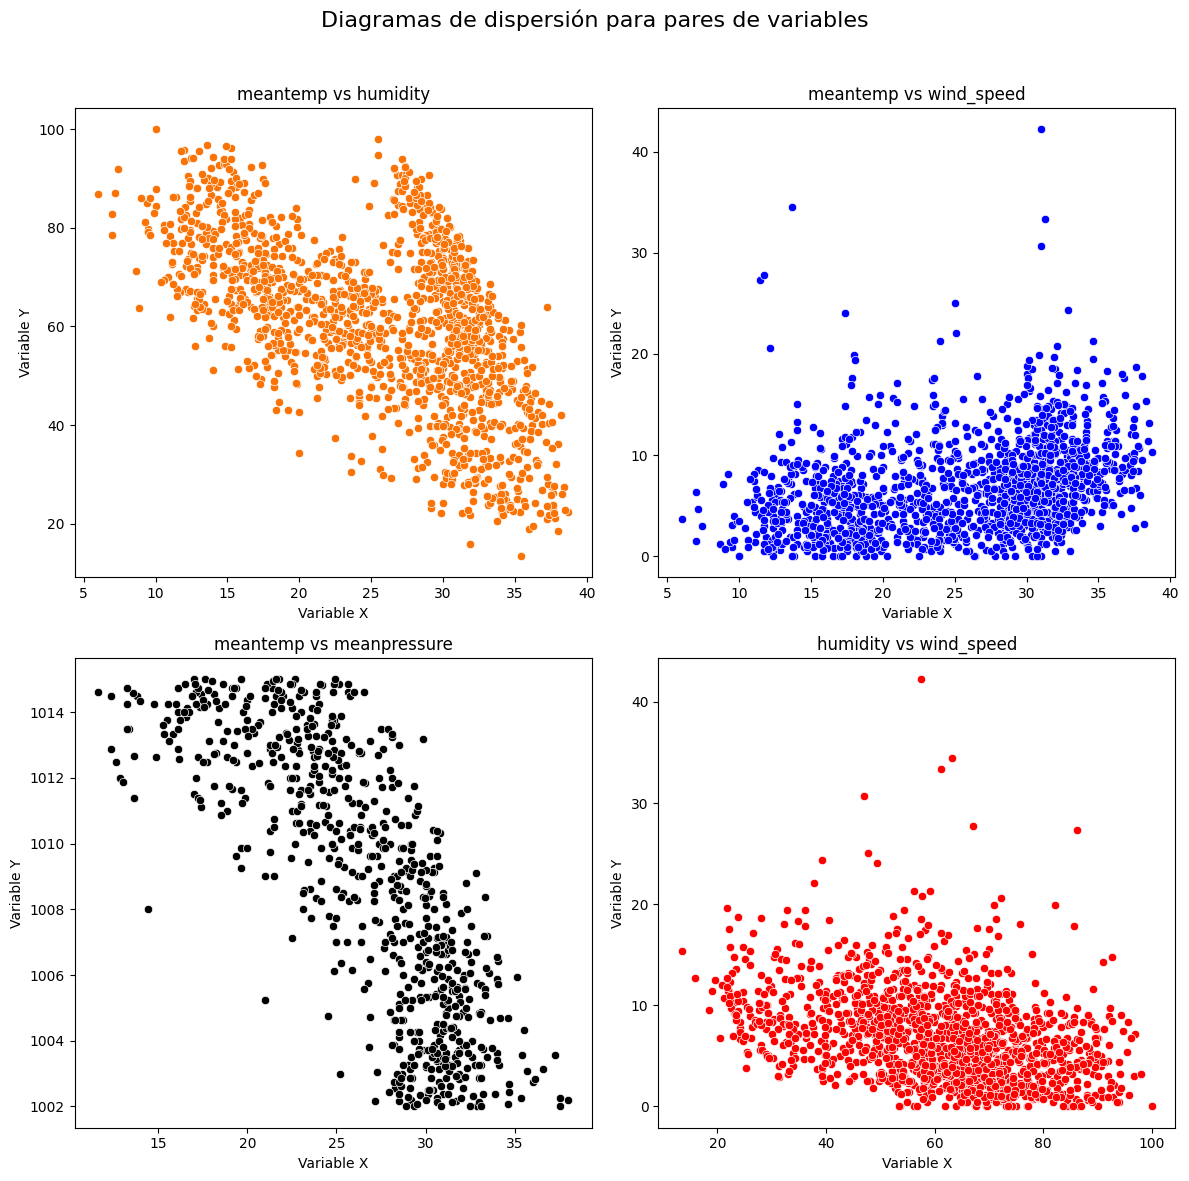

In [ ]:
#Utilizando subgráficos, grafique 4 diagramas de dispersión
#para distintos pares de variables presentes en los datos.


# Crear figura y subgráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle("Diagramas de dispersión para pares de variables", fontsize=16)

# Graficar cada par de variables en su subgráfico
sns.scatterplot(x=delhi_df['meantemp'], y=delhi_df['humidity'], ax=axes[0, 0], color="#f97306")
axes[0, 0].set_title('meantemp vs humidity')

sns.scatterplot(x=delhi_df['meantemp'], y=delhi_df['wind_speed'], ax=axes[0, 1], color="blue")
axes[0, 1].set_title('meantemp vs wind_speed')

# Graficar cada par de variables en su subgráfico (en este caso quitare el
#dato atípico de meanpressure para poder observar mejor la relación entre variables )
# Filtrar los datos para eliminar los atípicos de 'meanpressure' menores a 1002 y mayores a 1015
filtered_delhi_df = delhi_df[(delhi_df['meanpressure'] >= 1002) & (delhi_df['meanpressure'] <= 1015)]

# Graficar 'meantemp' vs 'meanpressure' sin los atípicos
sns.scatterplot(x=filtered_delhi_df['meantemp'], y=filtered_delhi_df['meanpressure'], ax=axes[1, 0], color="black")
axes[1, 0].set_title('meantemp vs meanpressure')

sns.scatterplot(x=delhi_df['humidity'], y=delhi_df['wind_speed'], ax=axes[1, 1], color="red")
axes[1, 1].set_title('humidity vs wind_speed')

# Ajustar etiquetas y espaciado
for ax in axes.flat:
    ax.set_xlabel("Variable X")
    ax.set_ylabel("Variable Y")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Ahora si, podemos visualizar la relación negativa entre ambas variables, para verificar la significancia de esta correlación deberíamos volver a realizar el mapa de correlaciones pero con este filtro. Vamos a ver.

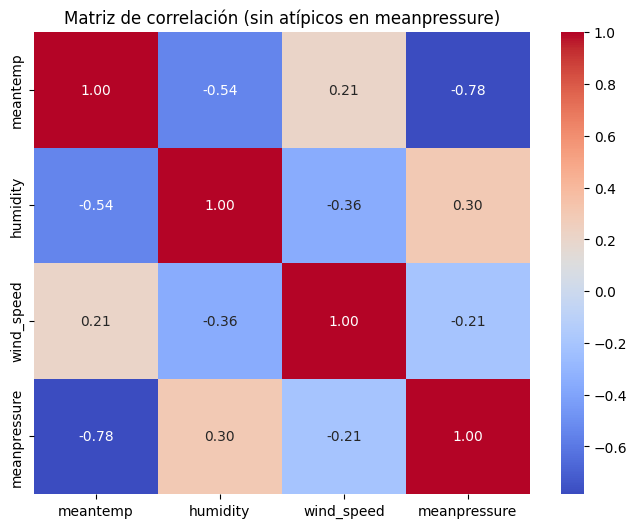

In [ ]:
# Filtrar los datos para eliminar los atípicos de 'meanpressure' menores a 1002 y mayores a 1015
filtered_delhi_df = delhi_df[(delhi_df['meanpressure'] >= 1002) & (delhi_df['meanpressure'] <= 1015)]

# Filtrar solo las columnas numéricas
numeric_columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
correlation_matrix = filtered_delhi_df[numeric_columns].corr()

# Graficar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de correlación (sin atípicos en meanpressure)")
plt.show()

Cuando consideramos todos los datos de presión atmosférica la correlación entre esta variable y la temperatura media es de -0.04, sin embargo al quitar estos datos atípicos de la presión atmosférica la correlación se vuelve -0.78, lo que quiere decir que se fortalece la relación negativa entre estas variables. lo mismo ocurre al compararla con la humedad, pasando de ser 0.0 a 0.3 y con la velocidad del viento, pasando de -0.02 a -0.21.

con esto concluimos que los datos atípicos efectivamente afectan nuestras conclusiones con respecto a lo observado en la muestra y podría afectar nuestras decisiones.

### <font color='purple'>Fin experimento </font>

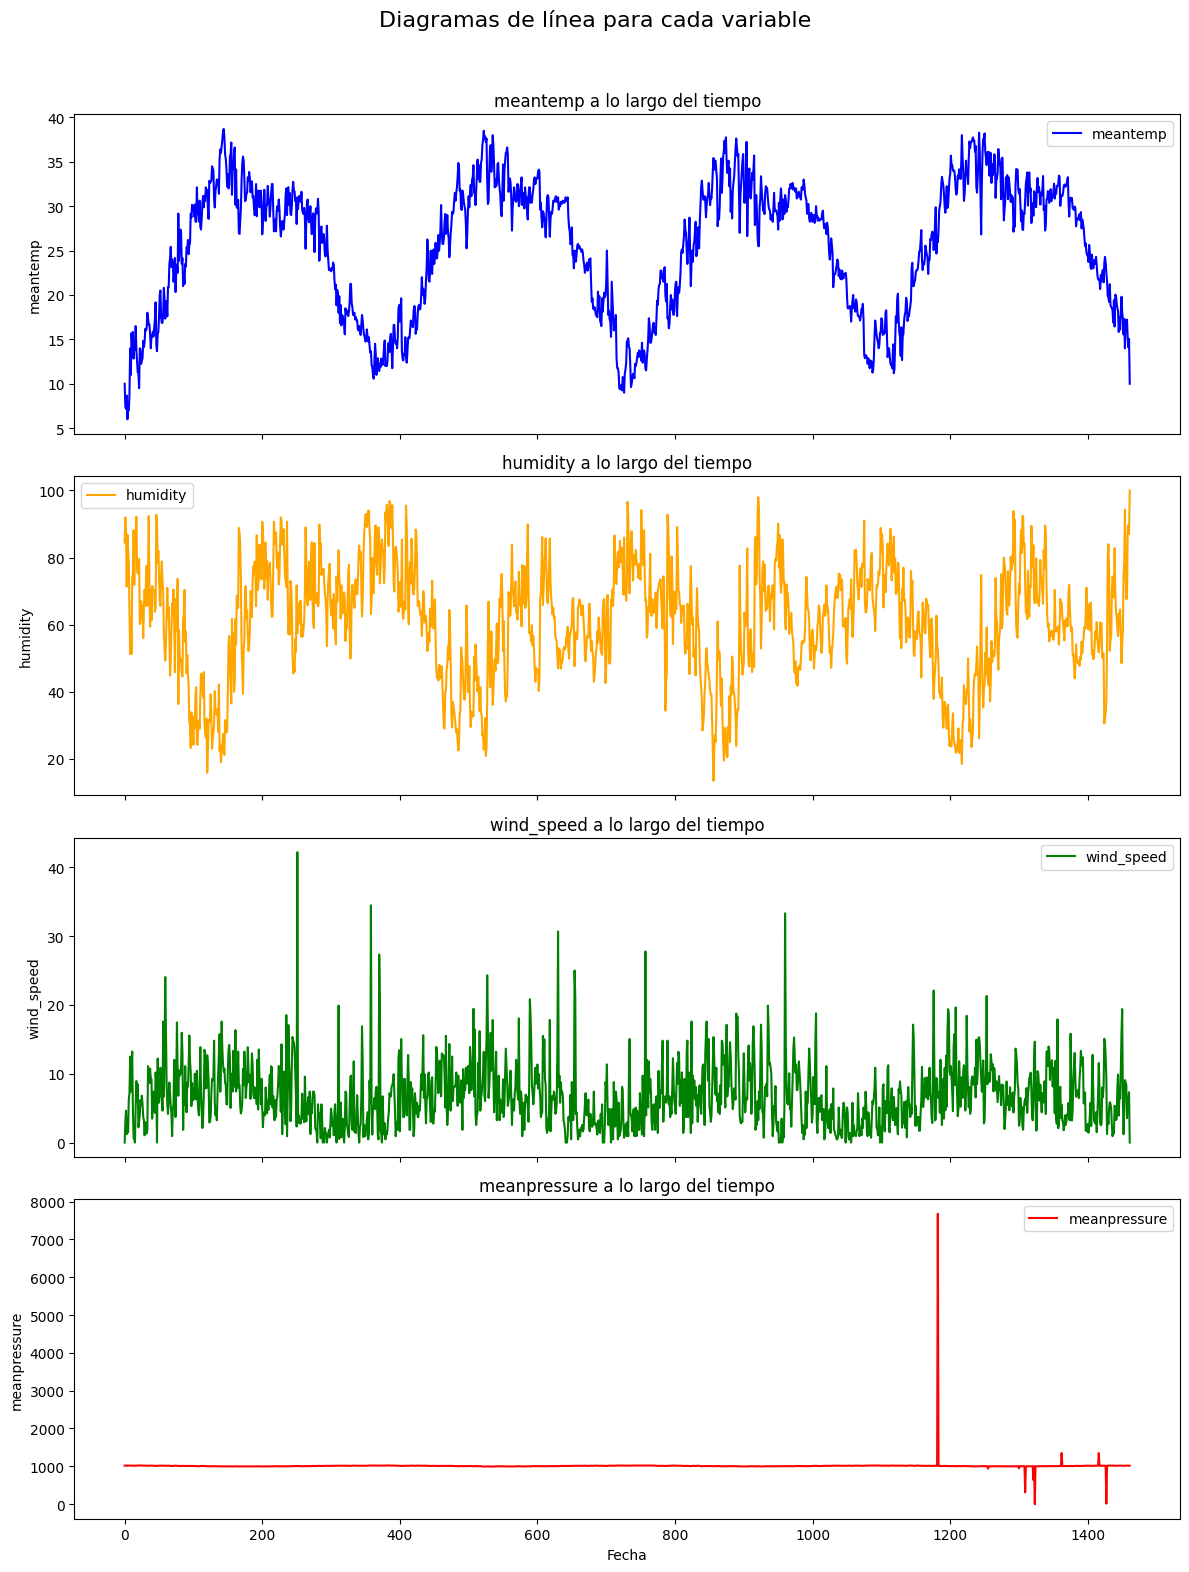

In [ ]:
#5.- Utilizando subgráficos, grafique 4 diagramas de línea para cada posible variable del set de datos,
#utilice distintos colores para diferenciar las variables ¿Que podemos notar con esta representación?

# Crear subgráficos
fig, axes = plt.subplots(4, 1, figsize=(12, 16), sharex=True)
fig.suptitle("Diagramas de línea para cada variable", fontsize=16)

# Colores para cada variable
colors = ['blue', 'orange', 'green', 'red']

# Graficar cada variable
variables = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
for i, var in enumerate(variables):
    axes[i].plot(delhi_df.index, delhi_df[var], color=colors[i], label=var)
    axes[i].set_title(f"{var} a lo largo del tiempo")
    axes[i].set_ylabel(var)
    axes[i].legend()

axes[-1].set_xlabel("Fecha")  # Etiqueta para el eje x en el último subgráfico
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

*¿Que podemos notar con esta representación?*

**Temperatura promedio**

La temperatura primedio parece tener un comportamiento bastante cíclico, con lo cual podríamos intuír que esto se alinea con las estaciones del año.

**Humedad**

Asimismo la humedad también muestra una tendencia hacia un patron más ciclico pero no es tan marcado como la temperatura promedio.

Visualmente se observa una relación inversa entre la variable de humedad y la variable de temperatura a lo largo del tiempo, lo cual se respalda con la tendencia del diagrama de dispersión mostrado en el punto anterior.

**Velocidad del viento**

La velocidad del viento también presenta una evolución cíclica a lo largo del tiempo, en este gráfico ya se comienza a ver que los datos atípicos comienzan a ensuciar la visualización.

**Presión atmosférica promedio**

en este caso los datos atípicos ensucian por completo la visualización no permitiendo visualizar el comportamiento de la variable.


In [ ]:
#6.- Si es que existe algún problema con alguna de las variables, utilice el método ax[n,m].set_ylim((lim_bajo, lim_alto))
#para cambiar los valores del eje Y (Como sugerencia, utilice el rango intercuartil y la mediana de dicha variable para fijar los limites)
#Nota: Los gráficos deberían tener título y si llegasen a requerir, títulos en los ejes. Con respecto a las anotaciones, no es necesario que en cada gráfico estén presentes. Utilícelos a conciencia.

# Calcular IQR y determinar límites para cada variable
for var in variables:
    Q1 = delhi_df[var].quantile(0.25)
    Q3 = delhi_df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    print(f"{var}: IQR={IQR:.2f}, límites=[{lower_limit:.2f}, {upper_limit:.2f}]")


meantemp: IQR=12.45, límites=[0.18, 49.98]
humidity: IQR=21.84, límites=[17.61, 104.98]
wind_speed: IQR=5.76, límites=[-5.17, 17.88]
meanpressure: IQR=13.36, límites=[981.53, 1034.99]


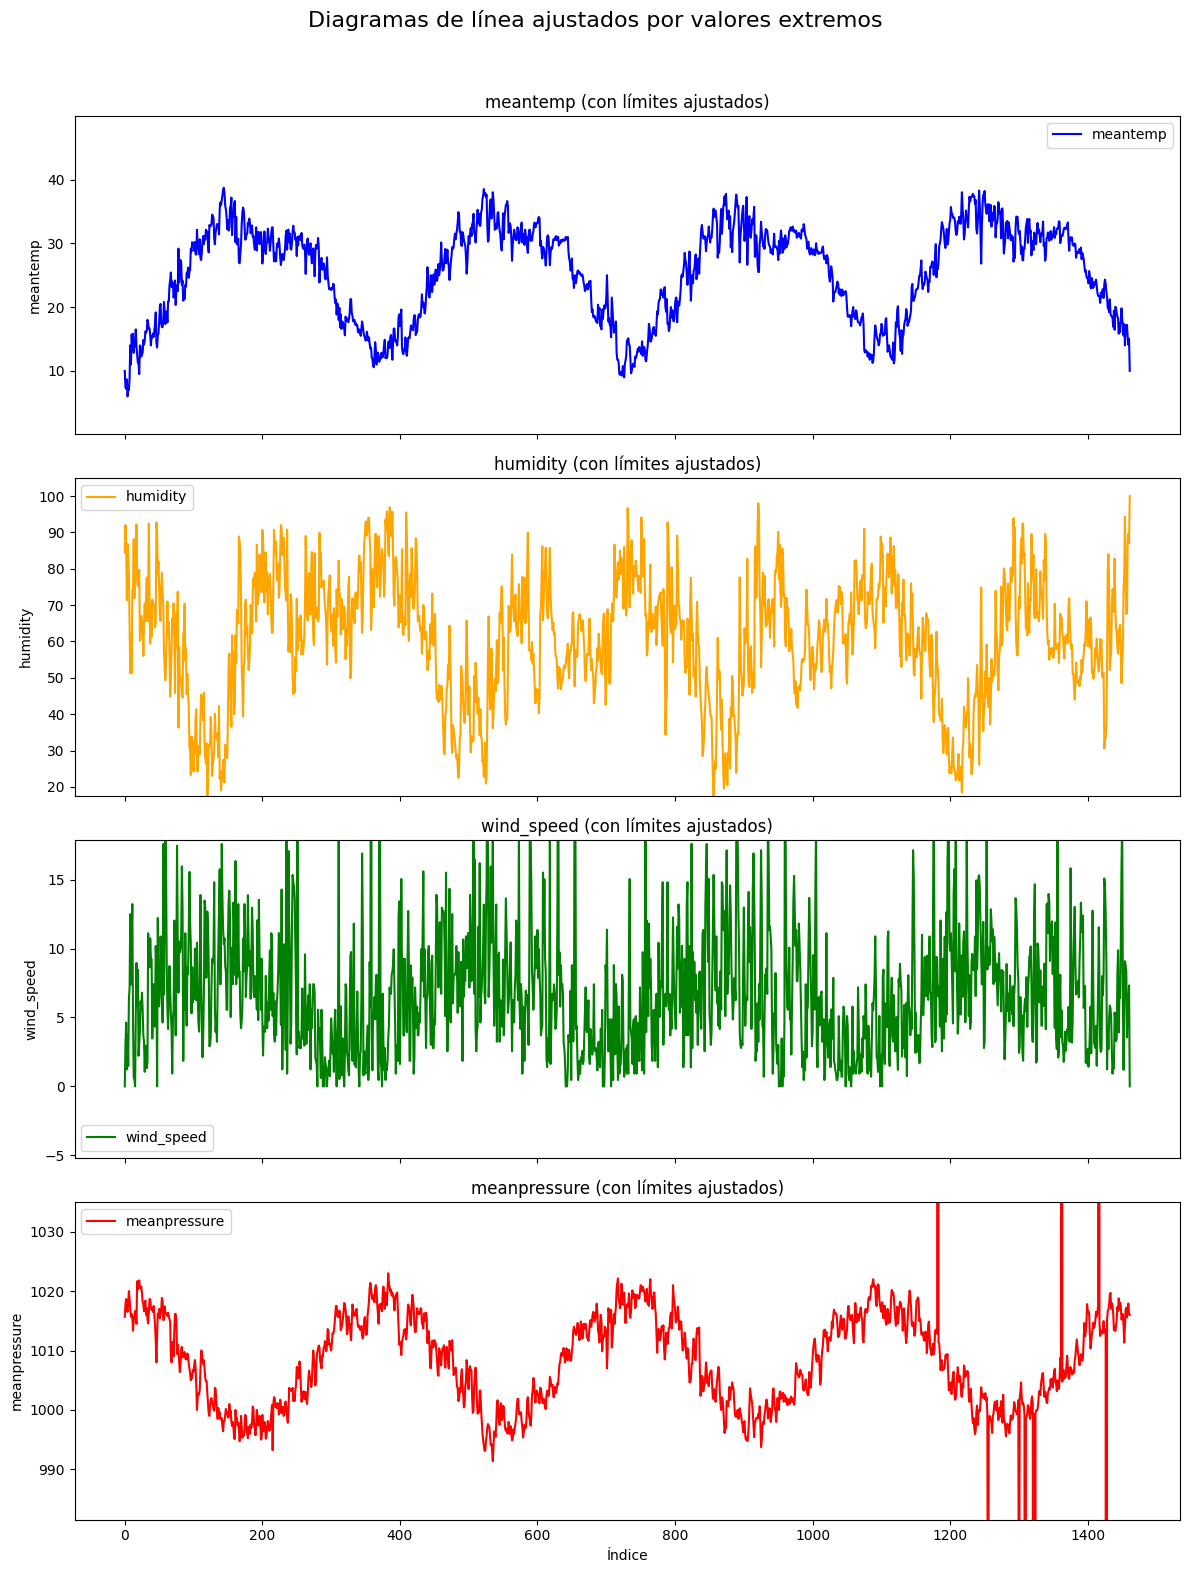

In [ ]:
# Variables a graficar
variables = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
colors = ['blue', 'orange', 'green', 'red']

# Crear subgráficos
fig, axes = plt.subplots(4, 1, figsize=(12, 16), sharex=True)
fig.suptitle("Diagramas de línea ajustados por valores extremos", fontsize=16)

# Graficar cada variable con límites ajustados
limites = {
    'meantemp': (0.18, 49.98),
    'humidity': (17.61, 104.98),
    'wind_speed': (-5.17, 17.88),
    'meanpressure': (981.53, 1034.99)
}

for i, var in enumerate(variables):
    lower_limit, upper_limit = limites[var]  # Obtener límites predefinidos
    axes[i].plot(delhi_df.index, delhi_df[var], color=colors[i], label=var)
    axes[i].set_title(f"{var} (con límites ajustados)")
    axes[i].set_ylabel(var)
    axes[i].legend()
    axes[i].set_ylim((lower_limit, upper_limit))  # Aplicar límites al eje Y

axes[-1].set_xlabel("Índice")  # Etiqueta del eje X
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Al ajustar los límites se puede visualizar mucho mejor el comportamiento cíclico de las variables y sobretodo de la presión, ya que no se podía distinguir.

In [ ]:
#7.- Reemplace los valores problemáticos de la variable. ¿Con que valor o método podríamos modificar estos datos problemáticos?

# Reemplazar valores fuera del rango con la mediana
for var in variables:
    Q1 = delhi_df[var].quantile(0.25)
    Q3 = delhi_df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    median = delhi_df[var].median()
    delhi_df[var] = delhi_df[var].apply(lambda x: median if x < lower_limit or x > upper_limit else x)

*¿Con que valor o método podríamos modificar estos datos problemáticos?*

fueron reemplazados con la mediana para no afectar la distribución de los datos

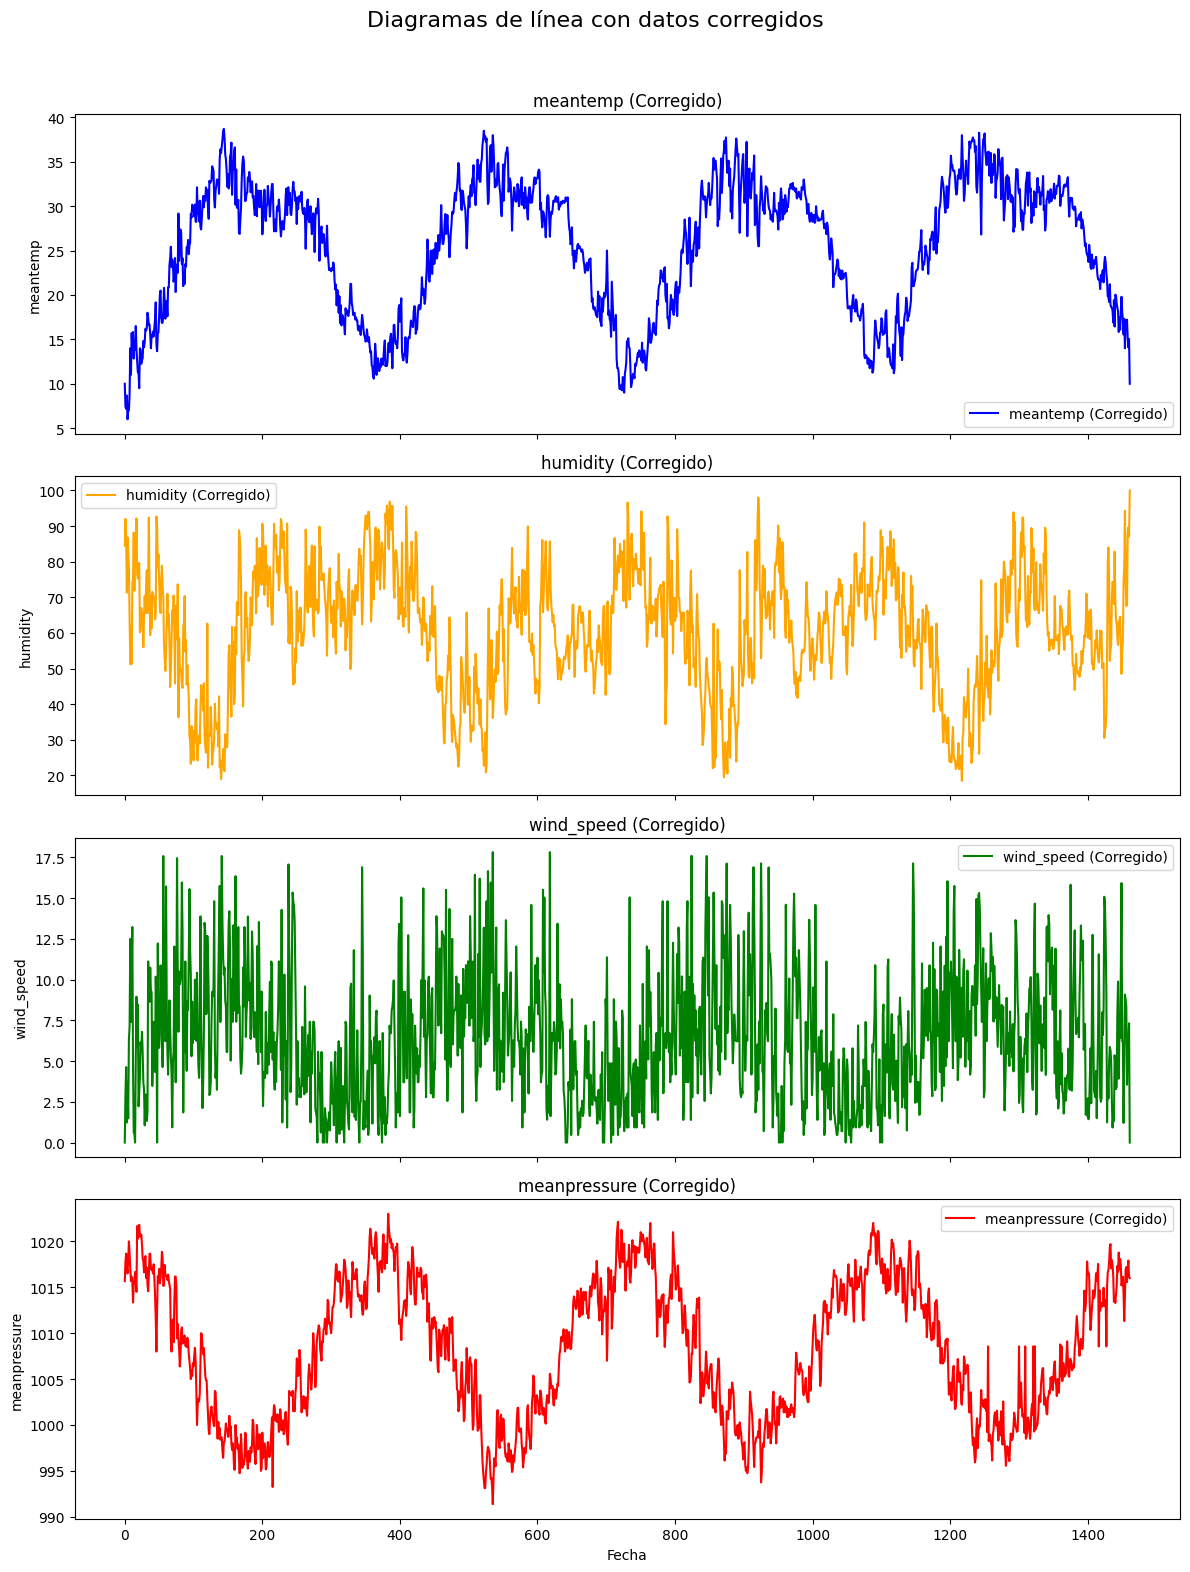

In [ ]:
#8.- Con los datos corregidos, genere nuevamente los gráficos. ¿Ahora hacen mayor sentido los gráficos?

# Graficar los datos corregidos
fig, axes = plt.subplots(4, 1, figsize=(12, 16), sharex=True)
fig.suptitle("Diagramas de línea con datos corregidos", fontsize=16)

for i, var in enumerate(variables):
    axes[i].plot(delhi_df.index, delhi_df[var], color=colors[i], label=f"{var} (Corregido)")
    axes[i].set_title(f"{var} (Corregido)")
    axes[i].set_ylabel(var)
    axes[i].legend()

axes[-1].set_xlabel("Fecha")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


*¿Ahora hacen mayor sentido los gráficos?*

Si, ahora hacen mucho más sentido los gráficos, pudiendo identificar el comportaiento de cada una de las variables en función del tiempo. Algo que podría a gregar que no se visualizaba en el primer gráfico es la relación inversa entre la velocidad del viento y la presión atmosférica.

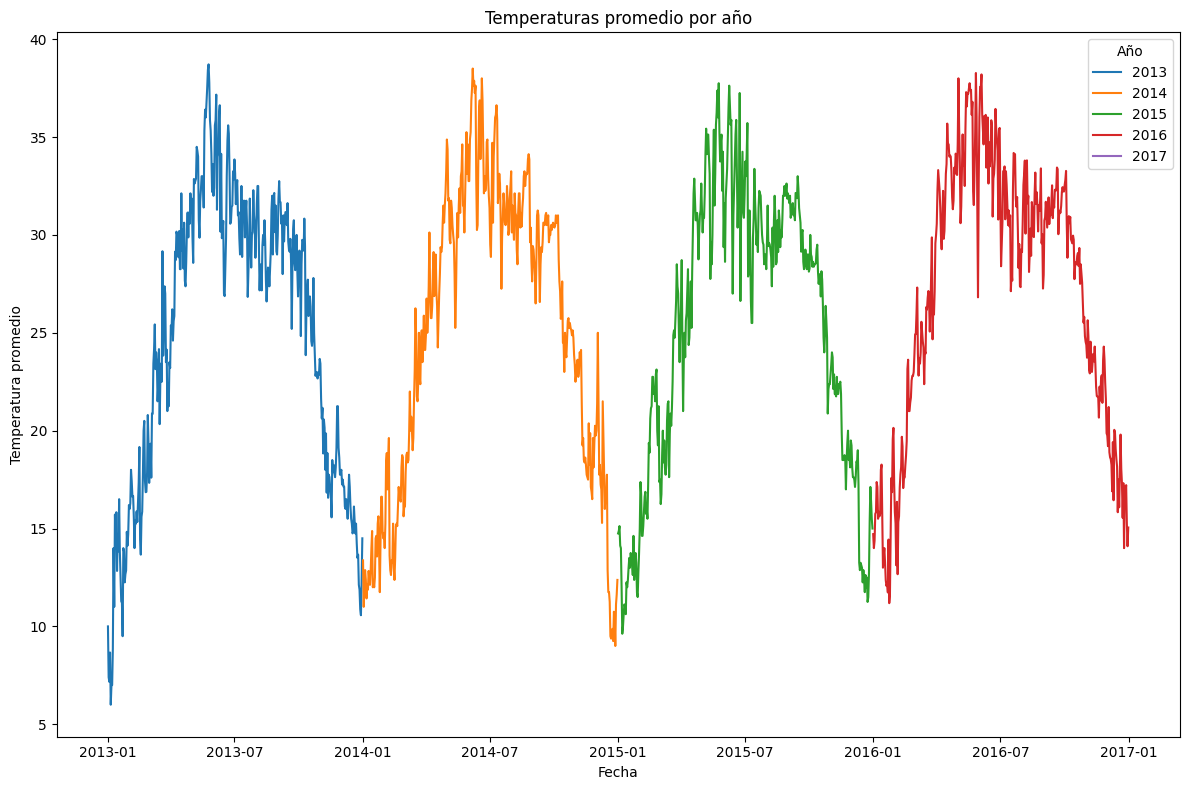

In [ ]:
#9.- Genere un gráfico con múltiples líneas con las temperaturas promedio. El color de cada línea,
#debe estar relacionado al año de dicha medición. (Como ayuda, tienen que extraer el año de la columna date
#y luego generar una nueva columna con dichos años).

# Convertir la columna de fecha a tipo datetime si no lo está
if 'date' in delhi_df.columns:  # Asegúrate de que exista la columna de fecha
    delhi_df['date'] = pd.to_datetime(delhi_df['date'])
else:
    raise ValueError("La columna 'date' no está presente en el DataFrame.")

# Crear columna de año
delhi_df['year'] = delhi_df['date'].dt.year

# Graficar temperaturas promedio por año
plt.figure(figsize=(12, 8))
for year, data in delhi_df.groupby('year'):  # Agrupar por año
    plt.plot(data['date'], data['meantemp'], label=str(year))  # Usar la columna de fechas para el eje X

# Configurar etiquetas y leyenda
plt.title("Temperaturas promedio por año")
plt.xlabel("Fecha")
plt.ylabel("Temperatura promedio")
plt.legend(title="Año")
plt.tight_layout()
plt.show()

<font color='green'>Fin actividad 2</font>